#                                      Breast Cancer Classification

## Attribute Information:

-  ID number 
- Diagnosis (M = malignant, B = benign)
- M is converted into 1, B is converted into 0


## Features that are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

##  Importing libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


## Load the data

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing

In [4]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [5]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
# checking for null values

df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
import pandas as pd
from scipy import stats
# Define a Z-score threshold for identifying outliers (e.g., Z-score > 3 or < -3)
z_score_threshold = 3

# Function to find outliers using Z-scores
def find_outliers_z_score(data_series):
    z_scores = np.abs(stats.zscore(data_series))
    outliers = data_series[z_scores > z_score_threshold]
    return outliers

# Iterate through columns and find outliers using Z-scores
outliers_per_column = {}
for column in df.columns:
    outliers = find_outliers_z_score(df[column])
    outliers_per_column[column] = outliers

# Print outliers for each column
for column, outliers in outliers_per_column.items():
    if not outliers.empty:
        print(f"Outliers in '{column}':")
        print(outliers)


Outliers in 'radius_mean':
82     25.22
180    27.22
212    28.11
352    25.73
461    27.42
Name: radius_mean, dtype: float64
Outliers in 'texture_mean':
219    32.47
232    33.81
239    39.28
259    33.56
Name: texture_mean, dtype: float64
Outliers in 'perimeter_mean':
82     171.5
122    166.2
180    182.1
212    188.5
352    174.2
461    186.9
521    165.5
Name: perimeter_mean, dtype: float64
Outliers in 'area_mean':
82     1878.0
122    1761.0
180    2250.0
212    2499.0
339    1747.0
352    2010.0
461    2501.0
521    1841.0
Name: area_mean, dtype: float64
Outliers in 'smoothness_mean':
3      0.14250
105    0.13980
122    0.14470
504    0.16340
568    0.05263
Name: smoothness_mean, dtype: float64
Outliers in 'compactness_mean':
0      0.2776
3      0.2839
78     0.3454
82     0.2665
108    0.2768
122    0.2867
181    0.2832
258    0.3114
567    0.2770
Name: compactness_mean, dtype: float64
Outliers in 'concavity_mean':
78     0.3754
82     0.3339
108    0.4264
122    0.4268
152  

In [13]:
import pandas as pd
from scipy import stats

z_score_threshold = 3

# Function to find outliers using Z-scores and calculate the percentage of outliers
def find_outliers_z_score(data_series):
    z_scores = np.abs(stats.zscore(data_series))
    outliers = data_series[z_scores > z_score_threshold]
    percentage_outliers = (len(outliers) / len(data_series)) * 100
    return percentage_outliers

# Create a dictionary to store the percentage of outliers for each column
percentage_outliers_per_column = {}

# Iterate through columns and calculate the percentage of outliers using Z-scores
for column in df.columns:
    percentage_outliers = find_outliers_z_score(df[column])
    percentage_outliers_per_column[column] = percentage_outliers

# Print the percentage of outliers for each column
for column, percentage in percentage_outliers_per_column.items():
    print(f"Percentage of outliers in '{column}': {percentage:.2f}%")


Percentage of outliers in 'diagnosis': 0.00%
Percentage of outliers in 'radius_mean': 0.88%
Percentage of outliers in 'texture_mean': 0.70%
Percentage of outliers in 'perimeter_mean': 1.23%
Percentage of outliers in 'area_mean': 1.41%
Percentage of outliers in 'smoothness_mean': 0.88%
Percentage of outliers in 'compactness_mean': 1.58%
Percentage of outliers in 'concavity_mean': 1.58%
Percentage of outliers in 'concave points_mean': 1.05%
Percentage of outliers in 'symmetry_mean': 0.88%
Percentage of outliers in 'fractal_dimension_mean': 1.23%
Percentage of outliers in 'radius_se': 1.23%
Percentage of outliers in 'texture_se': 1.58%
Percentage of outliers in 'perimeter_se': 1.41%
Percentage of outliers in 'area_se': 1.05%
Percentage of outliers in 'smoothness_se': 1.23%
Percentage of outliers in 'compactness_se': 2.11%
Percentage of outliers in 'concavity_se': 1.05%
Percentage of outliers in 'concave points_se': 1.05%
Percentage of outliers in 'symmetry_se': 1.93%
Percentage of outlier

In [14]:
df['diagnosis'].value_counts()/len(df['diagnosis'])*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

In [15]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [16]:
df.groupby('diagnosis').max()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.85,33.81,114.6,992.1,0.1634,0.2239,0.4108,0.08534,0.2743,0.09575,...,19.82,41.78,127.1,1210.0,0.2006,0.5849,1.252,0.175,0.4228,0.1486
1,28.11,39.28,188.5,2501.0,0.1447,0.3454,0.4268,0.20120,0.3040,0.09744,...,36.04,49.54,251.2,4254.0,0.2226,1.0580,1.170,0.291,0.6638,0.2075


In [17]:
df.groupby('diagnosis').std()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
1,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553


#### There are no missing values in the data. The Data has more number of benign case data

## Exploratory Data Analysis (EDA)

In [18]:
col=list(df.columns)

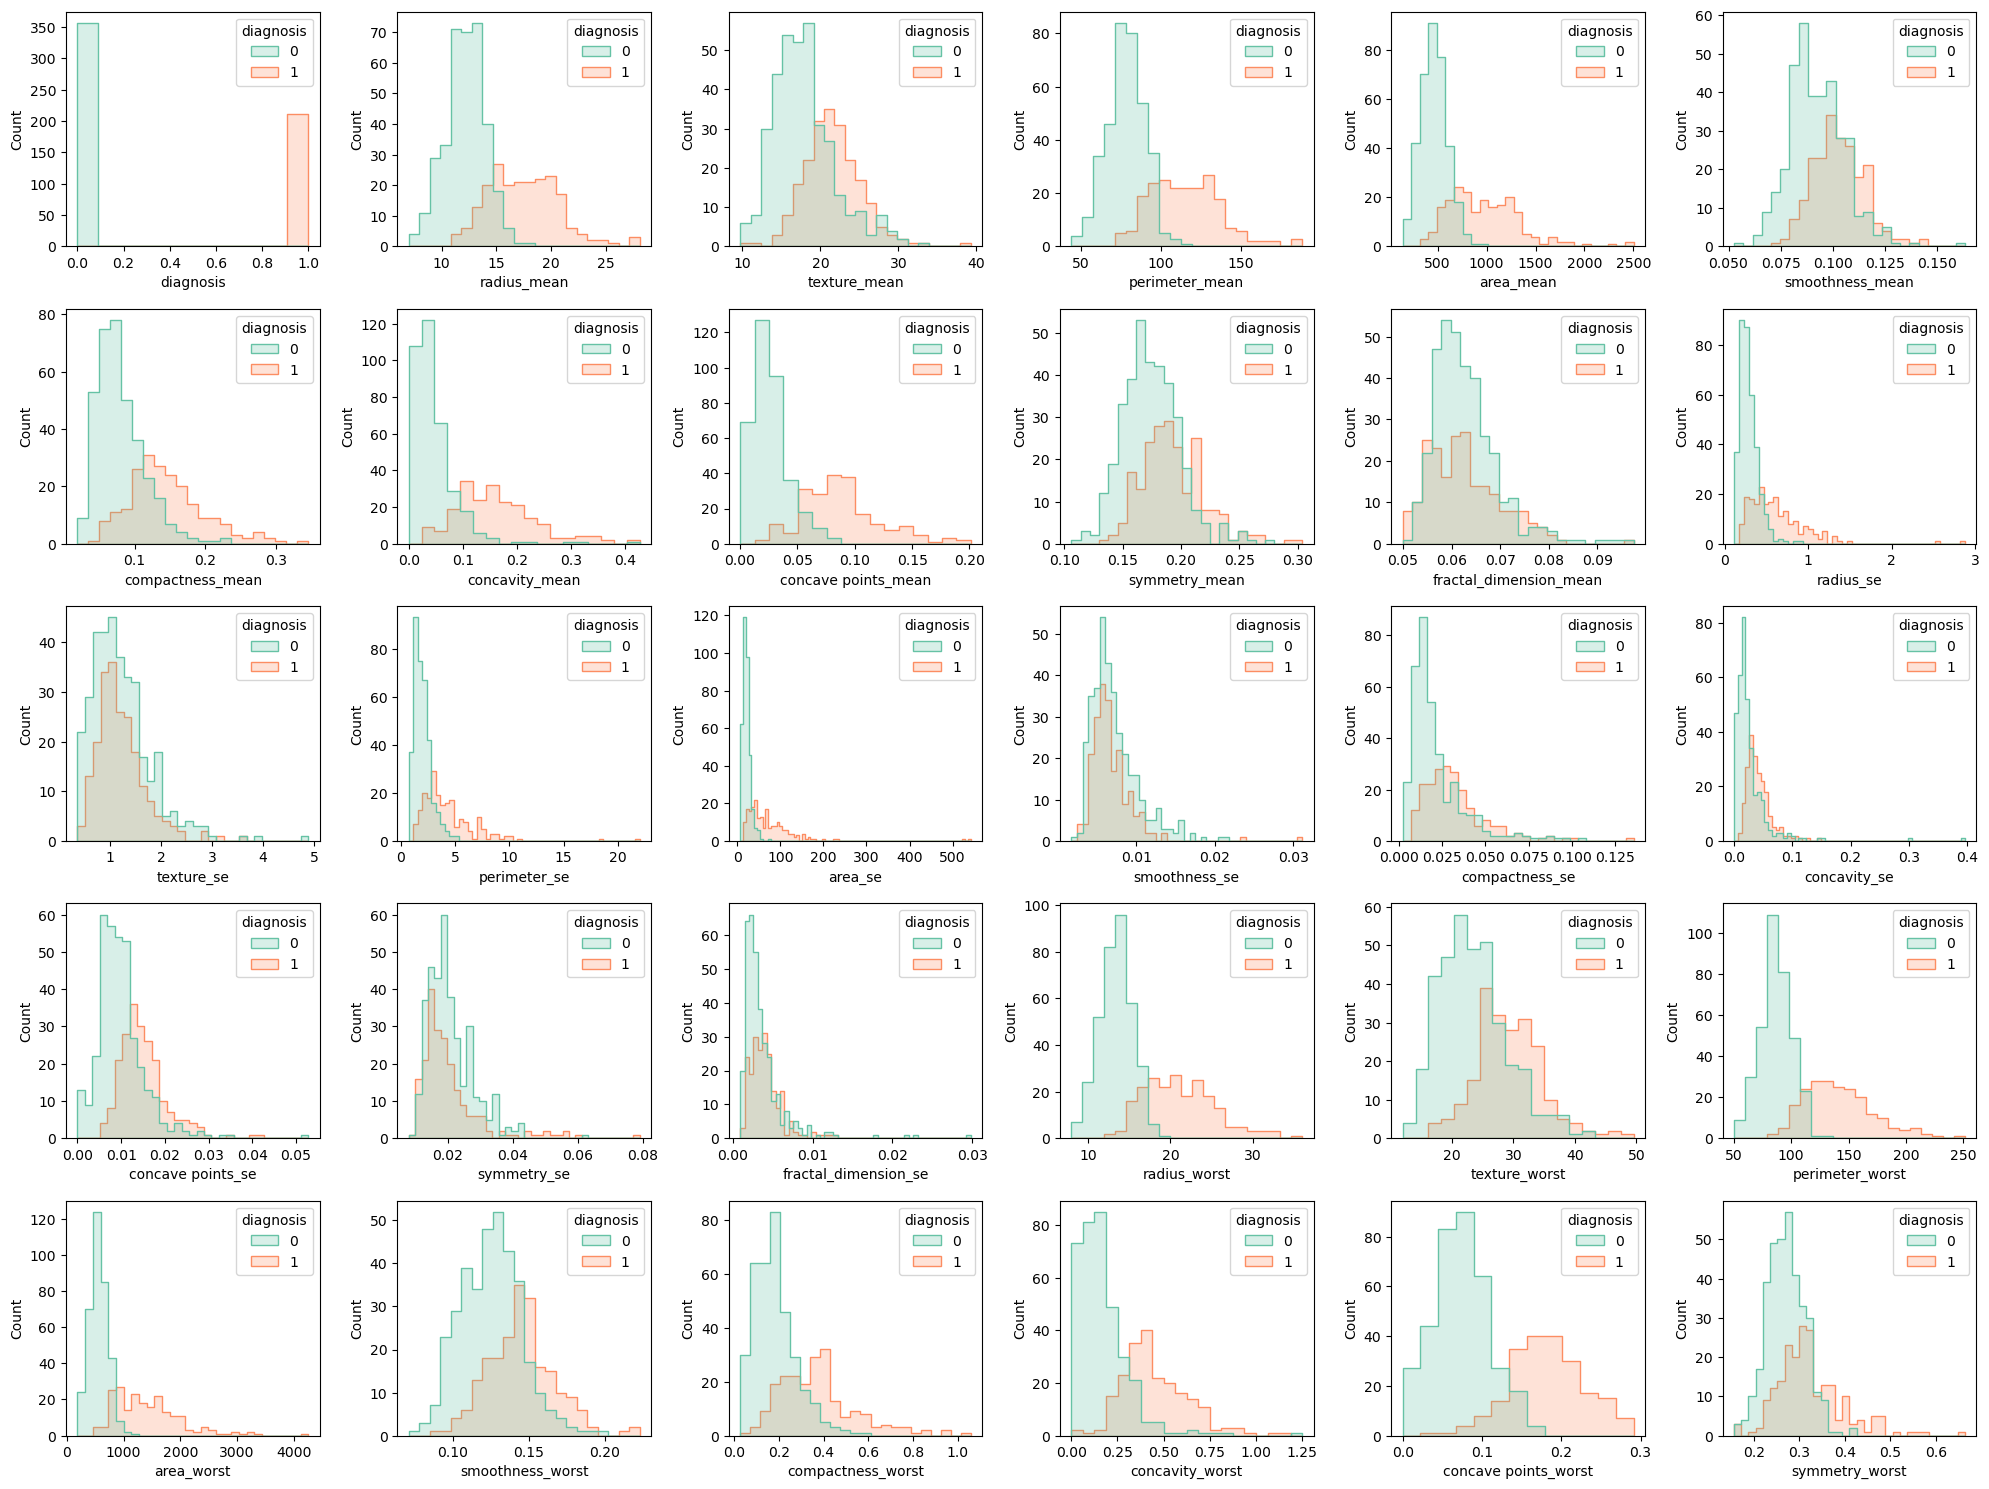

In [19]:
plt.figure(figsize = (20, 15))

plotnumber = 1

for i in col:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(data=df, x=i,hue=df['diagnosis'], multiple="layer", element="step", palette="Set2")
        plt.xlabel(i)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

    

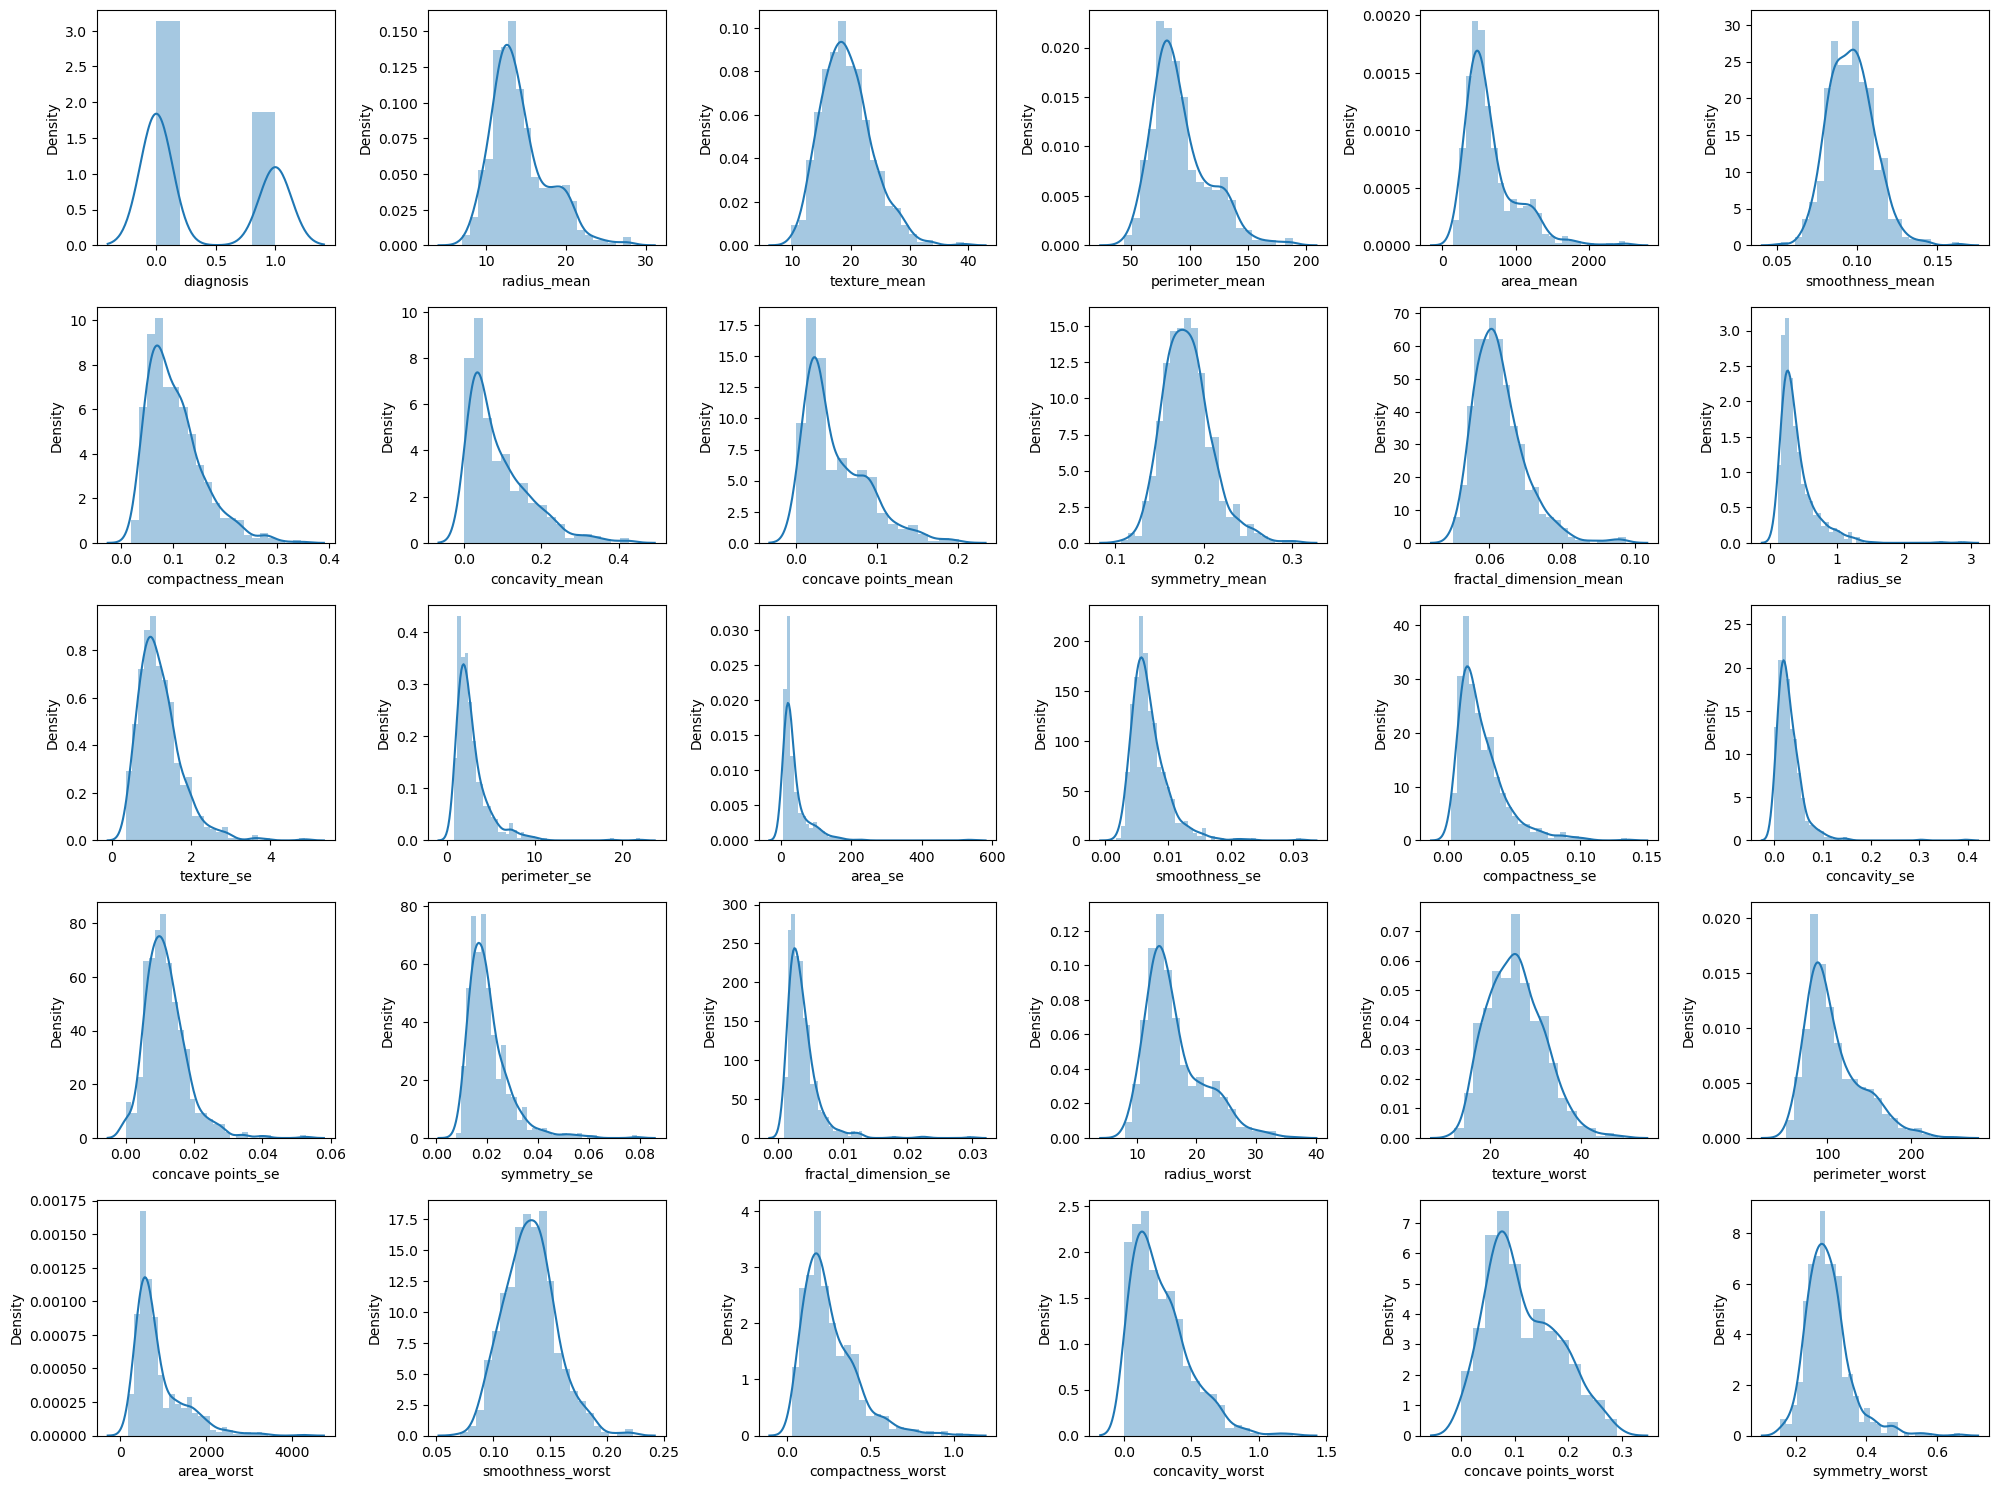

In [20]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [21]:
skewness = df.skew()
sque=[]

# the skewness for each column
for col in df.columns:
    s=skewness[col]
    sque.append(s) 
    print(f"Skewness for {col}: {skewness[col]:.4f}")
sque.sort()    




Skewness for diagnosis: 0.5285
Skewness for radius_mean: 0.9424
Skewness for texture_mean: 0.6504
Skewness for perimeter_mean: 0.9907
Skewness for area_mean: 1.6457
Skewness for smoothness_mean: 0.4563
Skewness for compactness_mean: 1.1901
Skewness for concavity_mean: 1.4012
Skewness for concave points_mean: 1.1712
Skewness for symmetry_mean: 0.7256
Skewness for fractal_dimension_mean: 1.3045
Skewness for radius_se: 3.0886
Skewness for texture_se: 1.6464
Skewness for perimeter_se: 3.4436
Skewness for area_se: 5.4472
Skewness for smoothness_se: 2.3145
Skewness for compactness_se: 1.9022
Skewness for concavity_se: 5.1105
Skewness for concave points_se: 1.4447
Skewness for symmetry_se: 2.1951
Skewness for fractal_dimension_se: 3.9240
Skewness for radius_worst: 1.1031
Skewness for texture_worst: 0.4983
Skewness for perimeter_worst: 1.1282
Skewness for area_worst: 1.8594
Skewness for smoothness_worst: 0.4154
Skewness for compactness_worst: 1.4736
Skewness for concavity_worst: 1.1502
Skewnes

In [22]:
print(f"Maximum Skewness is {sque[-1]} Minimum Skewness is {sque[0]}")    

Maximum Skewness is 5.447186284898394 Minimum Skewness is 0.4154259962824678


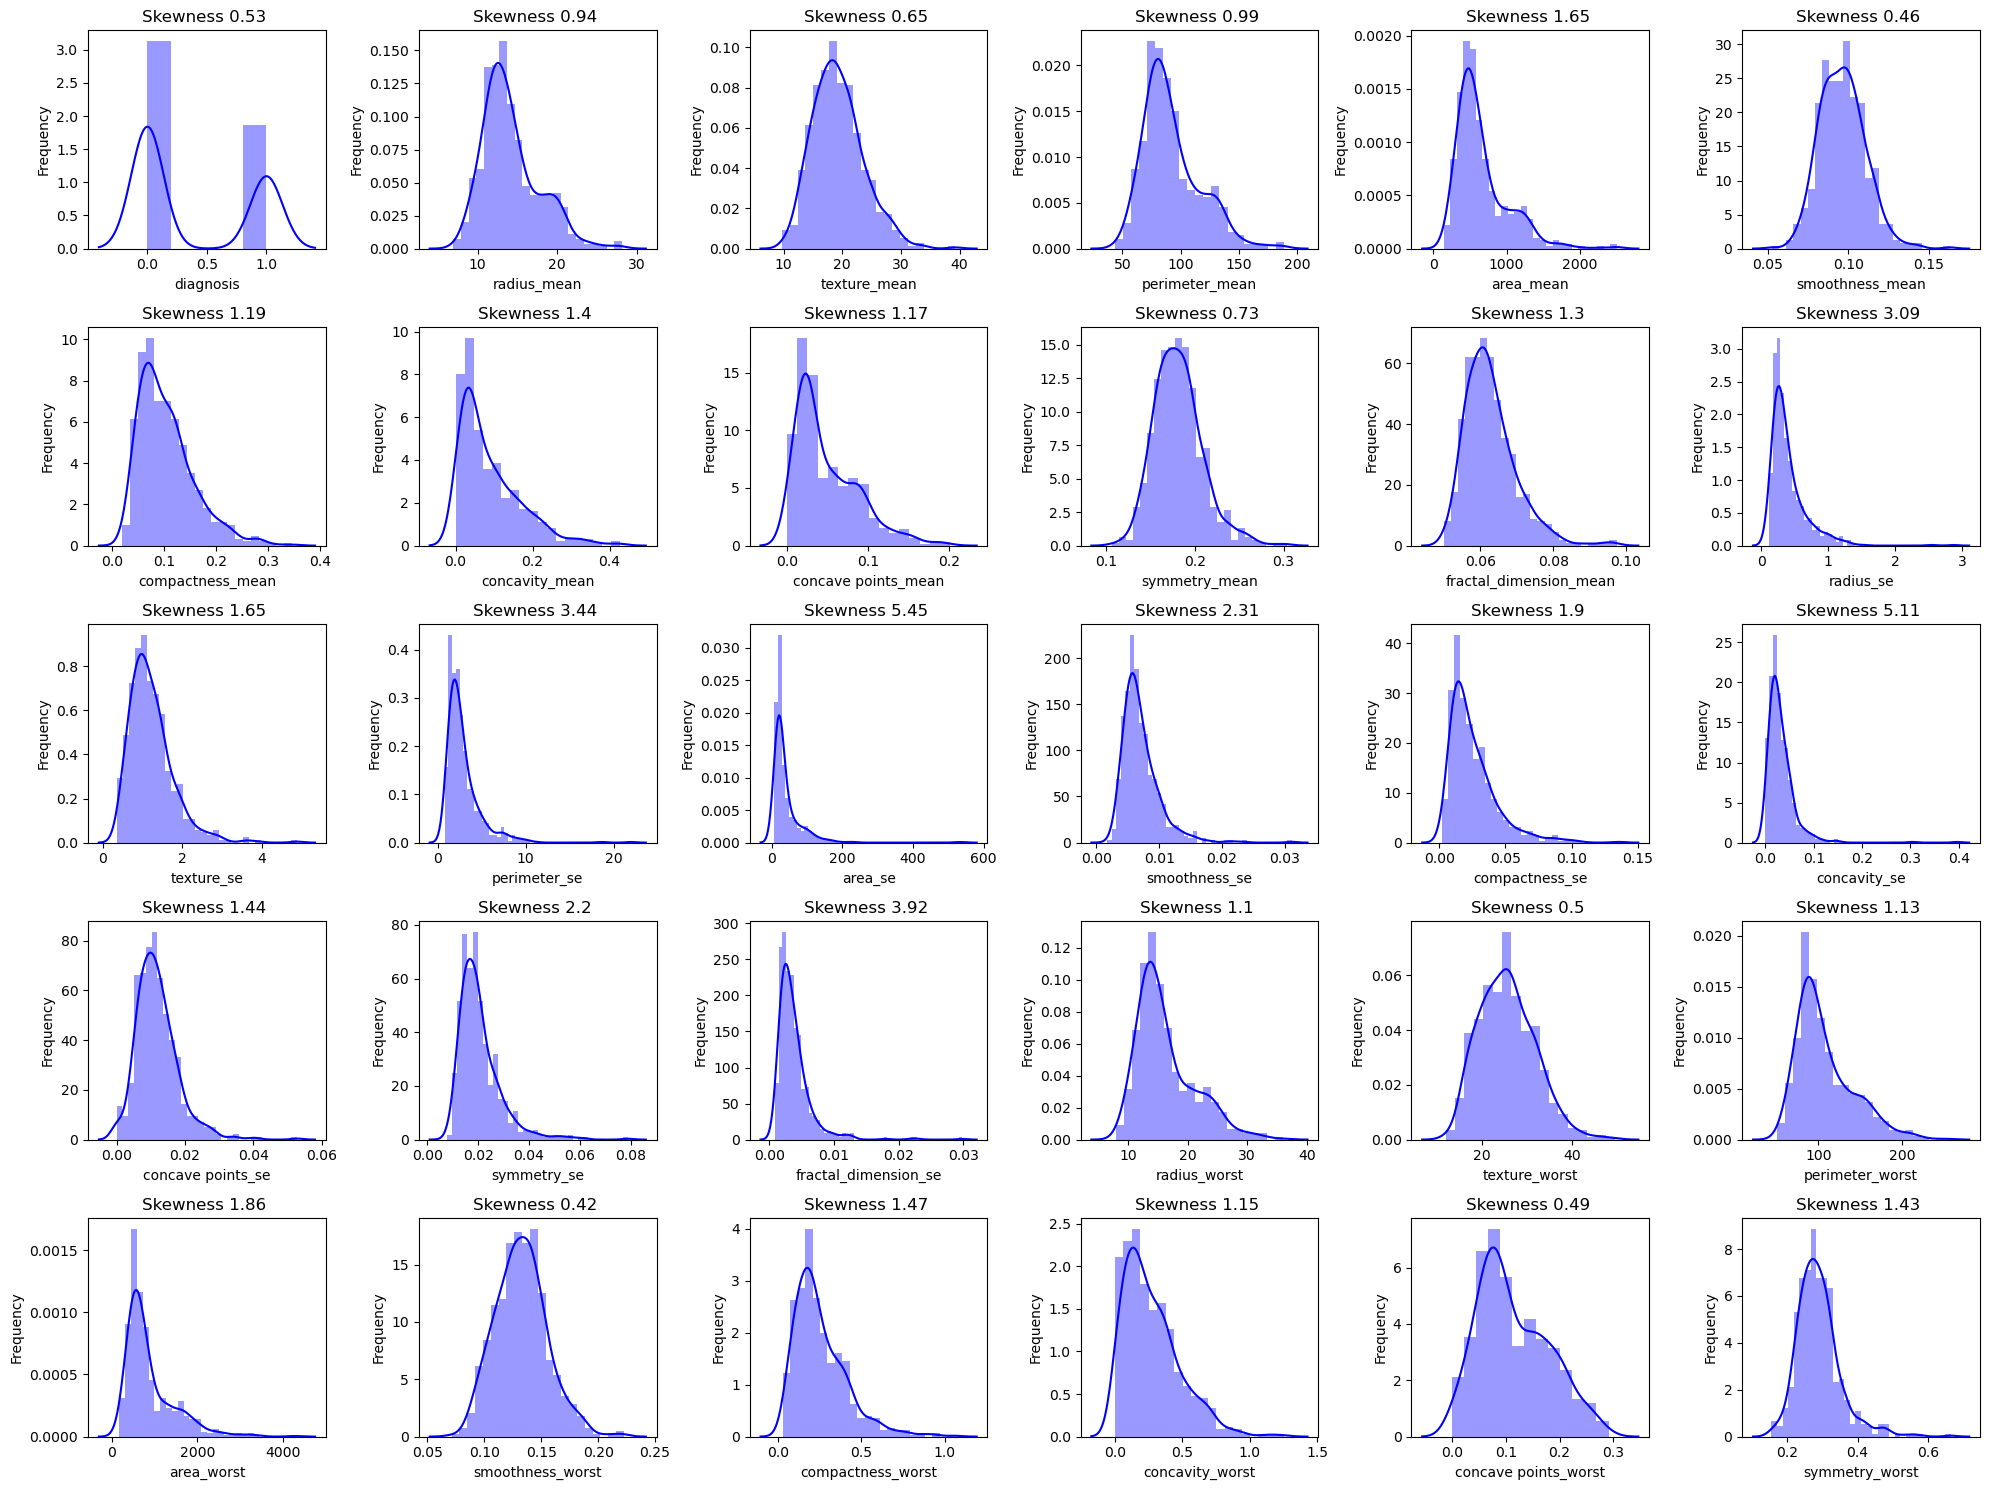

In [23]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        s=skewness[column]
        s=round(s,2)
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column], kde=True,color='b')
        plt.title(f'Skewness {s} ')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [24]:
import scipy.stats as stats

k = stats.kurtosis(df, fisher=False)
l=[]
for i in k:
    i=round(i,2)
    l.append(i)
    
print(f"Kurtosis: {l}")
k.sort()


Kurtosis: [1.28, 3.83, 3.74, 3.95, 6.61, 3.84, 4.63, 4.97, 4.05, 4.27, 5.97, 20.52, 8.29, 24.2, 51.77, 13.37, 8.05, 51.42, 8.07, 10.82, 29.04, 3.93, 3.21, 4.05, 7.35, 3.5, 6.0, 4.59, 2.46, 7.4, 8.19]


In [25]:
print(f"Mean kurtosis is {round(k.mean(),2)},Max kurtosis is {round(k.max(),2)}, Min kurtosis is {round(k.min(),2)} ")

Mean kurtosis is 10.43,Max kurtosis is 51.77, Min kurtosis is 1.28 


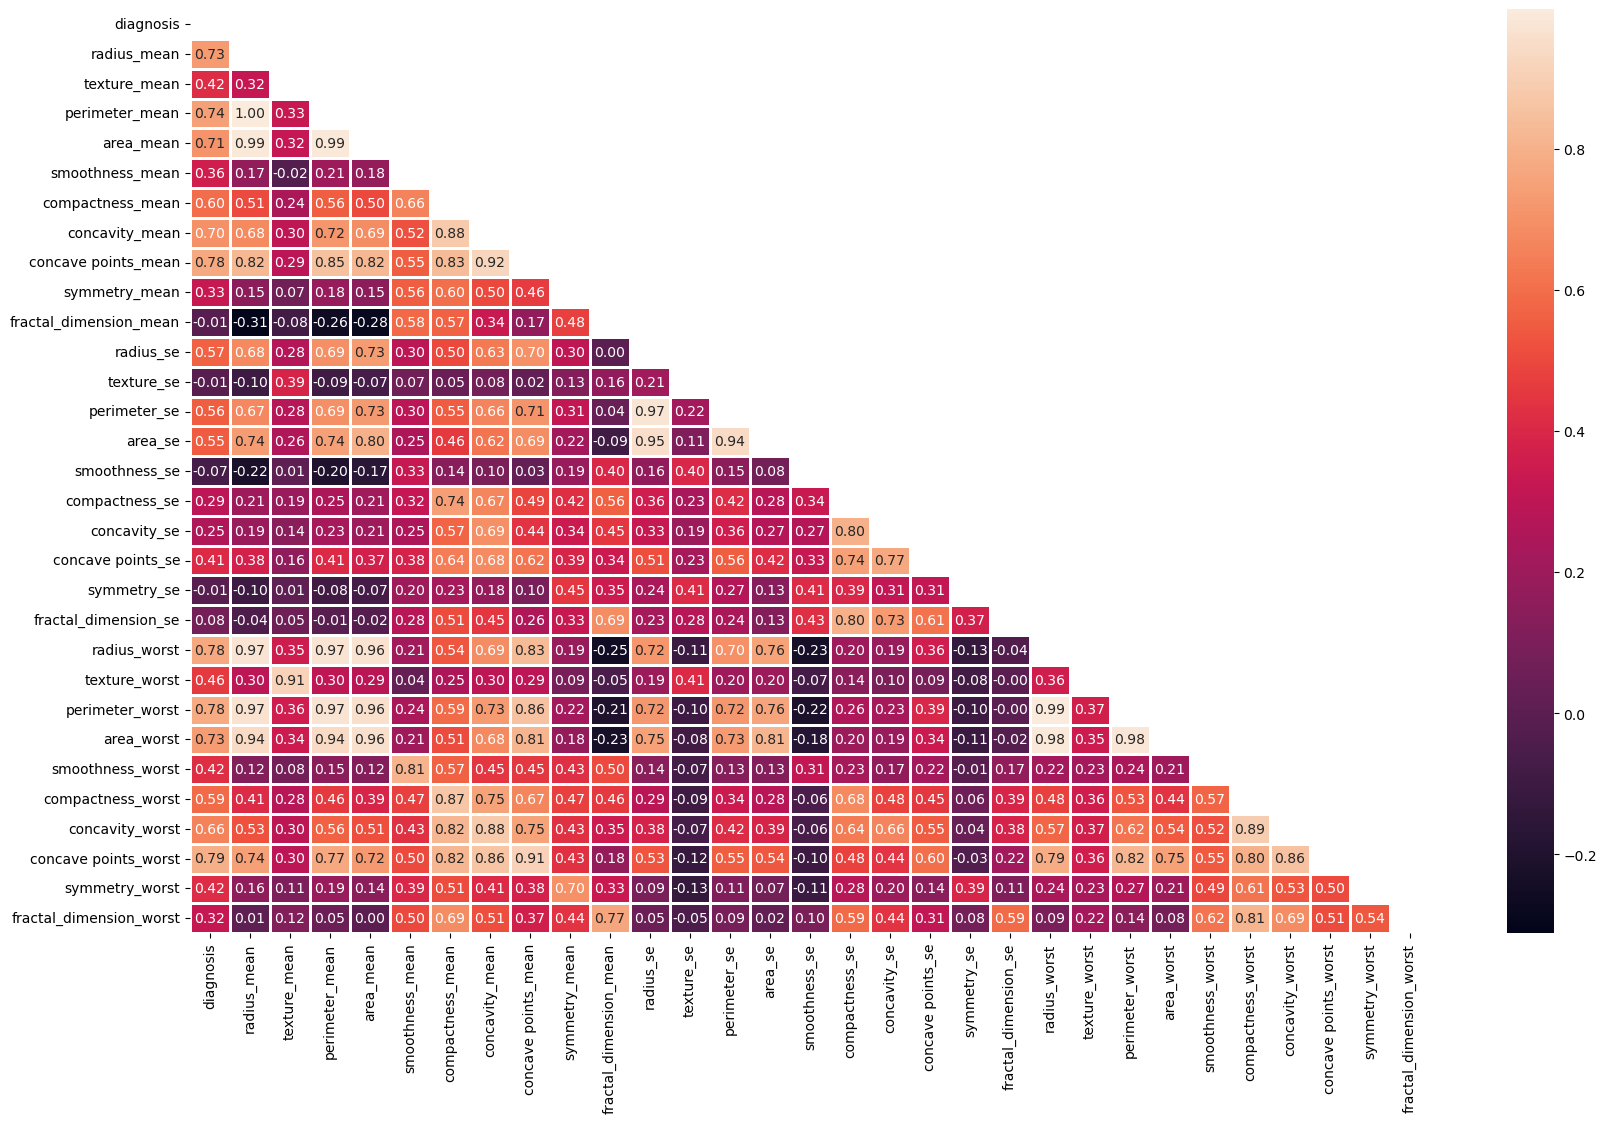

In [26]:
# heatmap 

plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

### We can see that there are many columns which are very highly correlated which causes multicollinearity so we need to handle highly correlated features.  

In [27]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

target_column = 'diagnosis'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Select the top k features using SelectKBest and mutual information
k_best = 9
selector = SelectKBest(mutual_info_classif, k=k_best)
X_train_resampled_kbest = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_kbest = selector.transform(X_test)

# Create a DataFrame with the top features and the target variable
top_features = X.columns[selector.get_support()]  # Get the names of the top features
df_top_features_resampled = pd.DataFrame(data=X_train_resampled_kbest, columns=top_features)
df_top_features_resampled[target_column] = y_train_resampled

# Display the DataFrame with top features after SMOTE
print("DataFrame with Top Features after SMOTE:")
df_top_features_resampled.head()


DataFrame with Top Features after SMOTE:


,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
0,9.029,58.79,250.5,0.31300,0.04375,10.31,65.50,324.7,0.17500,0
1,21.090,142.70,1311.0,0.24870,0.14960,26.68,176.50,2089.0,0.29030,1
2,9.173,59.20,260.9,0.05988,0.02180,10.01,65.59,310.1,0.05087,0
3,10.650,68.01,347.0,0.02379,0.01615,12.25,77.98,455.7,0.06136,0
4,10.170,64.55,311.9,0.01084,0.01290,11.02,69.86,368.6,0.02579,0


In [28]:
df_top_features_resampled.describe()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,14.809233,96.701782,720.560665,0.102334,0.055720,17.203659,113.912464,981.456536,0.126684,0.500000
std,3.693182,25.377620,372.559638,0.080869,0.039162,5.003364,34.739223,593.962701,0.065551,0.500438
min,7.691000,47.920000,170.400000,0.000000,0.000000,8.678000,54.490000,223.600000,0.000000,0.000000
25%,12.067500,77.915000,449.750000,0.036047,0.023288,13.347500,86.790000,547.400000,0.072740,0.000000
50%,13.887832,90.327069,597.441625,0.090460,0.048770,16.113372,105.900000,790.850000,0.124953,0.500000
75%,17.575000,115.246380,965.025688,0.150144,0.084711,20.583628,138.225000,1295.782242,0.176731,1.000000
max,28.110000,188.500000,2501.000000,0.426800,0.201200,36.040000,251.200000,4254.000000,0.291000,1.000000


In [29]:
df=df_top_features_resampled.copy()

In [30]:
len(df.columns)

10

In [31]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [32]:
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to replace outliers with the median in a DataFrame
def replace_outliers_with_median(dataframe, threshold=3):
    for column in dataframe.columns:
        z_scores = np.abs(stats.zscore(dataframe[column]))
        outliers = dataframe[column][z_scores > threshold]
        median = dataframe[column].median()
        dataframe[column][outliers.index] = median
    return dataframe

z_score_threshold = 3

# Replace outliers with median in the training data
X_train_no_outliers = replace_outliers_with_median(X_train, threshold=z_score_threshold)


In [33]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# K Neighbors Classifier (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

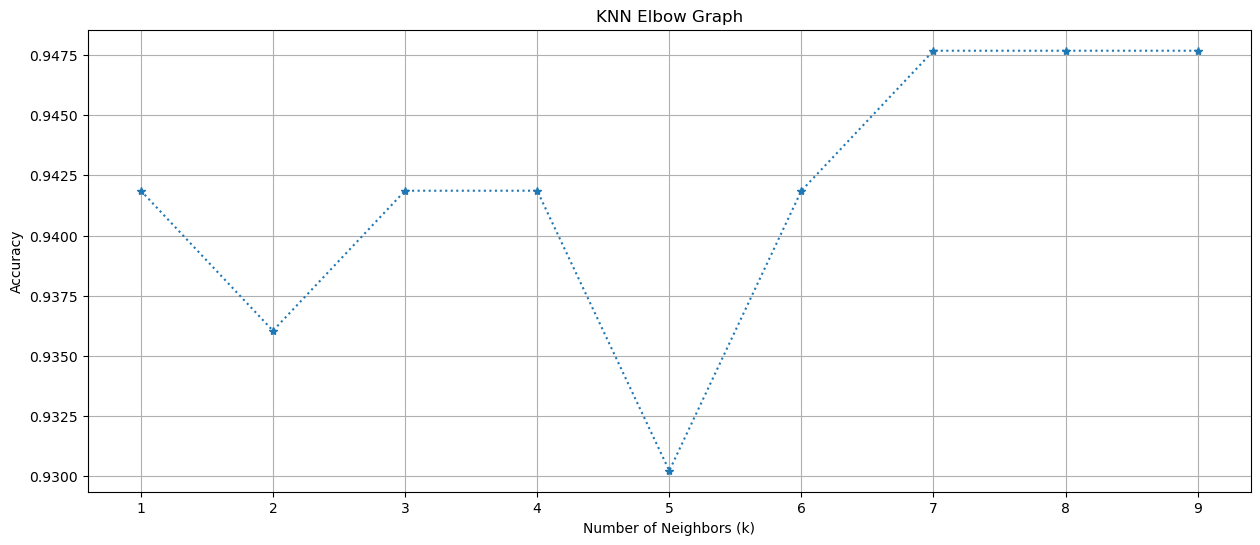

In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Range of k values to test
k_values = range(1, 10)

# Initialize lists to store accuracy scores for different k values
accuracy_scores = []

# Iterating through different k values and calculate accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)  # Predict on the test data
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the elbow graph
plt.figure(figsize=(15, 6))
plt.plot(k_values, accuracy_scores, marker='*', linestyle=':')
plt.title("KNN Elbow Graph")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [36]:

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
knn_acc = accuracy_score(y_test, knn.predict(X_test))


print(f"Accuracy For  NN in testing data is {accuracy}") 

Accuracy For  NN in testing data is 0.936046511627907


In [37]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        86
           1       1.00      0.87      0.93        86

    accuracy                           0.94       172
   macro avg       0.94      0.94      0.94       172
weighted avg       0.94      0.94      0.94       172



In [38]:
from sklearn.metrics import recall_score

rec_knn = recall_score(y_test, knn.predict(X_test))

print("Recall:", rec_knn)


Recall: 0.872093023255814


In [39]:
rec_knn=0.94

# Decision Tree Classifier

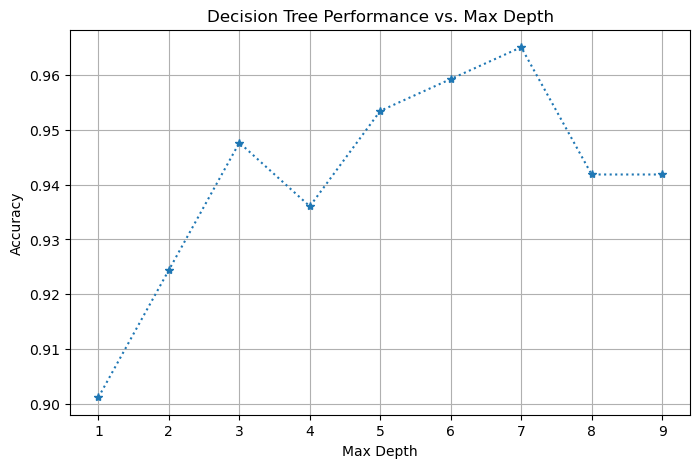

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#  creating a decision tree performance graph
max_depths = range(1, 10)  
accuracy_scores = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Splitting  data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fiting the decision tree model
    dt.fit(X_train, y_train)

    # Evaluate model accuracy on the test set
    accuracy = dt.score(X_test, y_test)
    accuracy_scores.append(accuracy)

# Create a plot to visualize the results
plt.figure(figsize=(8, 5))
plt.plot(max_depths, accuracy_scores, marker='*',linestyle=':')
plt.title("Decision Tree Performance vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [41]:

dtc = DecisionTreeClassifier(criterion = 'gini',max_depth=3)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
y_pred = dtc.predict(X_test)

In [43]:
# accuracy score

print(accuracy_score(y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.96
0.9593023255813954


In [44]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[81  5]
 [ 2 84]]


In [45]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        86
           1       0.94      0.98      0.96        86

    accuracy                           0.96       172
   macro avg       0.96      0.96      0.96       172
weighted avg       0.96      0.96      0.96       172



In [46]:
from sklearn.metrics import recall_score

rec_dt = recall_score(y_test, y_pred)

print("Recall:", rec_dt)


Recall: 0.9767441860465116


# Random Forest Classifier

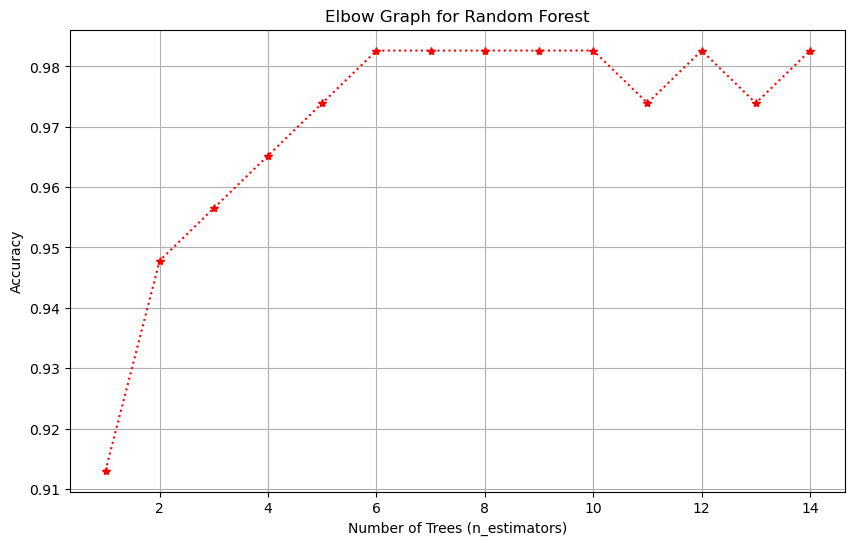

In [47]:

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of n_estimators
n_estimators_range = range(1, 15)  # You can adjust this range

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate through different values of n_estimators
for n_estimators in n_estimators_range:
    # Create a Random Forest classifier with the current number of trees
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Fit the model to the training data
    rf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Create an elbow plot to visualize the relationship between n_estimators and accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracy_scores, marker='*', linestyle=':', color='r')
plt.title("Elbow Graph for Random Forest")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [48]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(n_estimators=6, random_state=42)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6, random_state=42)

In [49]:
y_pred = rand_clf.predict(X_test)

In [50]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9912472647702407
0.9826086956521739


In [51]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[57  1]
 [ 1 56]]


In [52]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.98      0.98      0.98        57

    accuracy                           0.98       115
   macro avg       0.98      0.98      0.98       115
weighted avg       0.98      0.98      0.98       115



In [53]:
from sklearn.metrics import recall_score

rec_rand = recall_score(y_test, y_pred)

print("Recall:", rec_rand)


Recall: 0.9824561403508771


# Gradient Boosting Classifier

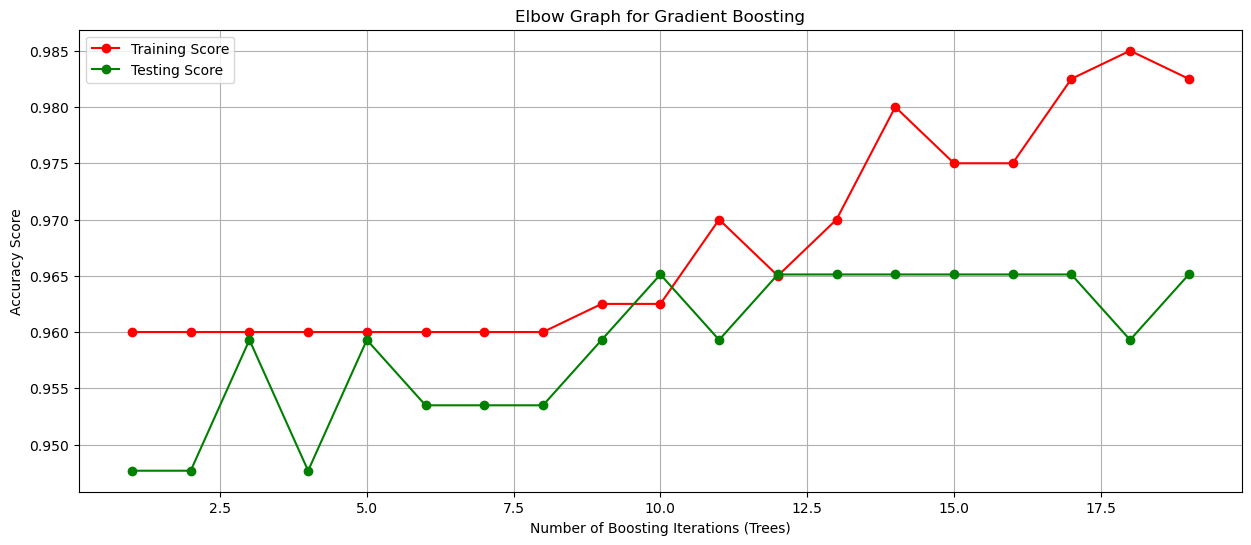

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of boosting iterations (trees)
n_estimators_range = np.arange(1, 20)  

# Initialize empty lists to store the training and testing scores
train_scores = []
test_scores = []

# Iterate over the range of boosting iterations
for n_estimators in n_estimators_range:
    # Create and fit the Gradient Boosting Classifier
    gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    gb_classifier.fit(X_train, y_train)
    
    # Calculate the training and testing scores
    train_score = gb_classifier.score(X_train, y_train)
    test_score = gb_classifier.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Create an elbow graph to visualize the scores
plt.figure(figsize=(15, 6))
plt.plot(n_estimators_range, train_scores, marker='o', label='Training Score', color='red')
plt.plot(n_estimators_range, test_scores, marker='o', label='Testing Score', color='green')
plt.title('Elbow Graph for Gradient Boosting')
plt.xlabel('Number of Boosting Iterations (Trees)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid()
plt.show()

In [55]:

gbc = GradientBoostingClassifier()

GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
    
# Calculate the training and testing scores
train_score = gb_classifier.score(X_train, y_train)
test_score = gb_classifier.score(X_test, y_test)

print(f"Scores for GBC in trainning = {train_score} and testing = {test_score}")

Scores for GBC in trainning = 0.9825 and testing = 0.9651162790697675


In [56]:
# gbc = GradientBoostingClassifier(learning_rate = .1, n_estimators = 50)
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [57]:
y_pred = gbc.predict(X_test)

In [58]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

1.0
0.9709302325581395


In [59]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[82  4]
 [ 1 85]]


In [60]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        86
           1       0.96      0.99      0.97        86

    accuracy                           0.97       172
   macro avg       0.97      0.97      0.97       172
weighted avg       0.97      0.97      0.97       172



In [61]:
from sklearn.metrics import recall_score

rec_gbm = recall_score(y_test, y_pred)

print("Recall:", rec_gbm)


Recall: 0.9883720930232558


# Extreme Gradient Boosting

In [62]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


model = xgb.XGBClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


xgb_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {xgb_acc:.2f}')
xgb_acc=xgb_acc


Accuracy: 0.97


In [63]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[82  4]
 [ 2 84]]


In [64]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        86
           1       0.95      0.98      0.97        86

    accuracy                           0.97       172
   macro avg       0.97      0.97      0.97       172
weighted avg       0.97      0.97      0.97       172



In [65]:
from sklearn.metrics import recall_score

rec_xgb = recall_score(y_test, y_pred)

print("Recall:", rec_xgb)


Recall: 0.9767441860465116


In [66]:
models = pd.DataFrame({
    'Model': ['KNN',  'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier',  'XgBoost'],
    'Score': [ knn_acc*100, dtc_acc*100, ran_clf_acc*100,  gbc_acc*100,  xgb_acc*100],
    "Recall" :[rec_knn*100,rec_dt*100,rec_rand*100,rec_gbm*100,rec_xgb*100]
})

models.sort_values(by = 'Recall', ascending = False)

,Model,Score,Recall
3,Gradient Boosting Classifier,97.093023,98.837209
2,Random Forest Classifier,98.260870,98.245614
1,Decision Tree Classifier,95.930233,97.674419
4,XgBoost,96.511628,97.674419
0,KNN,93.604651,94.000000


In [67]:
import pandas as pd
from sklearn.metrics import log_loss
import numpy as np
from sklearn.metrics import recall_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = knn_model.score(X_test, y_test)
rec_knn = recall_score(y_test, knn_pred)

dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)
dtc_pred = dtc_model.predict(X_test)
dtc_acc = dtc_model.score(X_test, y_test)
rec_dt = recall_score(y_test, dtc_pred)

ran_clf_model = RandomForestClassifier(random_state=42)
ran_clf_model.fit(X_train, y_train)
ran_clf_pred = ran_clf_model.predict(X_test)
ran_clf_acc = ran_clf_model.score(X_test, y_test)
rec_rand = recall_score(y_test, ran_clf_pred)

gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train, y_train)
gbc_pred = gbc_model.predict(X_test)
gbc_acc = gbc_model.score(X_test, y_test)
rec_gbm = recall_score(y_test, gbc_pred)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = xgb_model.score(X_test, y_test)
rec_xgb = recall_score(y_test, xgb_pred)

# Calculate BIC for each model
def calculate_bic(y_true, y_pred_proba, num_params):
    n = len(y_true)
    log_likelihood = -log_loss(y_true, y_pred_proba, normalize=False)
    bic = -2 * log_likelihood + num_params * np.log(n)
    return bic
knn_pred_proba = knn_model.predict_proba(X_test)[:, 1]
dtc_pred_proba = dtc_model.predict_proba(X_test)[:, 1]
ran_clf_pred_proba = ran_clf_model.predict_proba(X_test)[:, 1]
gbc_pred_proba = gbc_model.predict_proba(X_test)[:, 1]
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate BIC for each model
num_params_knn = 1  # For KNN, consider the number of neighbors as a parameter
num_params_dtc = len(dtc_model.feature_importances_) + 1
num_params_ran_clf = len(ran_clf_model.feature_importances_) + 1
num_params_gbc = len(gbc_model.feature_importances_) + 1
num_params_xgb = len(xgb_model.feature_importances_) + 1

bic_knn = calculate_bic(y_test, knn_pred_proba, num_params_knn)
bic_dtc = calculate_bic(y_test, dtc_pred_proba, num_params_dtc)
bic_ran_clf = calculate_bic(y_test, ran_clf_pred_proba, num_params_ran_clf)
bic_gbc = calculate_bic(y_test, gbc_pred_proba, num_params_gbc)
bic_xgb = calculate_bic(y_test, xgb_pred_proba, num_params_xgb)

# Create a DataFrame with model results
models = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
              'Gradient Boosting Classifier', 'XgBoost'],
    'BIC': [bic_knn, bic_dtc, bic_ran_clf, bic_gbc, bic_xgb],
    "Recall": [rec_knn * 100, rec_dt * 100, rec_rand * 100, rec_gbm * 100, rec_xgb * 100]
})

# Sort the DataFrame by BIC in ascending order
models_sorted_by_bic = models.sort_values(by='Recall')

# Display the sorted DataFrame
print(models_sorted_by_bic)


                          Model         BIC     Recall
0                           KNN  173.386891  87.719298
1      Decision Tree Classifier  479.973162  98.245614
2      Random Forest Classifier   61.851443  98.245614
3  Gradient Boosting Classifier   61.637293  98.245614
4                       XgBoost   57.732828  98.245614


# XgBoost:

- XgBoost has the lowest BIC value among the models, indicating better model fit based on the BIC criterion. Additionally, it has a high Recall of 95.35%, suggesting that XgBoost is effective at identifying positive instances.

# Random Forest Classifier:

- The Random Forest Classifier has the second-lowest BIC value, indicating good model fit. The Recall is also high at 93.02%, suggesting that it performs well in capturing positive instances.

# Gradient Boosting Classifier:

- The Gradient Boosting Classifier has a higher BIC value compared to XgBoost and Random Forest, indicating a relatively less favorable fit based on the BIC criterion. However, the Recall is still high at 93.02%, indicating good performance in identifying positive instances.

# KNN (K-Nearest Neighbors):

- KNN has the highest BIC value among the models, suggesting a less favorable fit based on the BIC criterion. The Recall is high at 95.35%, indicating good performance in capturing positive instances. It's worth noting that KNN's BIC might be influenced differently as it relies on a different concept (number of neighbors) compared to parametric models.

# Decision Tree Classifier:

- The Decision Tree Classifier has the highest BIC value, indicating the least favorable fit based on the BIC criterion. The Recall is still reasonable at 93.02%, suggesting decent performance in capturing positive instances.